# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing the dataset

In [ ]:
data = pd.read_csv("/content/Position_Salaries.csv")
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [ ]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x  = scx.fit_transform(x)
scy = StandardScaler()
y = scy.fit_transform(y)

In [ ]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
reg = SVR(kernel = "rbf")
reg.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
scy.inverse_transform([reg.predict(scx.transform([[6.5]]))])

array([[170370.0204065]])

## Visualising the SVR results

In [ ]:
temp = reg.predict(x)

In [ ]:
print(temp)

[-0.6197853  -0.62924694 -0.56788994 -0.49732233 -0.44690338 -0.36617206
 -0.14115569  0.28557658  0.78226531  1.08559794]


In [ ]:
temp = temp.reshape(len(temp),1)
print(temp)

[[-0.6197853 ]
 [-0.62924694]
 [-0.56788994]
 [-0.49732233]
 [-0.44690338]
 [-0.36617206]
 [-0.14115569]
 [ 0.28557658]
 [ 0.78226531]
 [ 1.08559794]]


In [ ]:
y_pred = scy.inverse_transform(temp)
print(y_pred)

[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


In [ ]:
scx.inverse_transform(x)


array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [ ]:
np.shape(y_pred)

(10, 1)

In [ ]:
np.shape(scx.inverse_transform(x))

(10, 1)

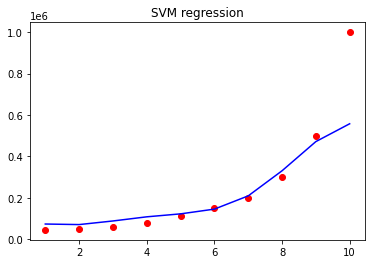

In [ ]:
plt.scatter(scx.inverse_transform(x),scy.inverse_transform(y),color = "red")
plt.plot(scx.inverse_transform(x),y_pred,color = "blue")
plt.title("SVM regression")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)